In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
data = pd.read_csv("./data/data.csv")
feature = data.columns.values 
feature = np.delete(feature,0)

y = data.iloc[:,0].values
x = data.drop(columns = ['discomfort']).values
x4= data[['ev_mean','omega_mode','pos_mean','ls_mean']].values
for i in range(len(y)):
    if y[i] == 'No':
        y[i] = 0
    else:
        y[i] = 1

Removing features with low variance

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples

In [3]:
print(x.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x)
print(x.shape)

(252, 168)
(252, 168)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


The advantage of using the gradient boosting algorithm is that the importance score for each attribute can be obtained relatively directly after the boosting tree has been created. The importance score, in general, measures the value of the feature in the construction of the boosted decision tree in the model. The more an attribute is used in the construction of the decision tree in the model, the higher its relative importance.

Attribute importance is obtained by calculating and ranking each attribute in the dataset. Attribute importance is calculated in a single decision tree by the amount of improvement in the performance measure at each attribute split point. It is up to the node to weight and record the number of times, meaning that the larger an attribute is for the split point improvement performance measure (the closer it is to the root node), the greater the weight; the more lifted trees it is selected by, the more important the attribute is. The performance metric can be the Gini purity of the selected split node, or it can be some other metric function.

Ultimately the results of an attribute in all boosted trees are weighted and summed and then averaged to obtain an importance score.

[18:15:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


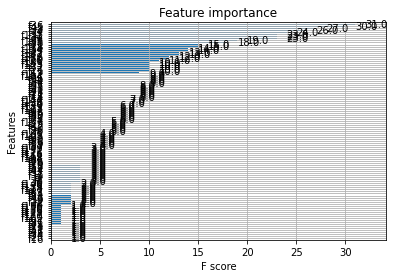

In [4]:
model = XGBClassifier()
model.fit(x, y)

plot_importance(model)
pyplot.show()

Features sorted from highest to lowest (top 10)

In [5]:
nf =  len(model.feature_importances_)
f_list = model.feature_importances_
f_sort = [] 
for i in range(nf):
    f_sort.append(i)


for i in range(nf):
    for j in range(nf-1):
        if f_list[j] < f_list[j+1]:
            js = f_list[j]
            f_list[j] = f_list[j+1]
            f_list[j+1] = js
            js = f_sort[j]
            f_sort[j] = f_sort[j+1]
            f_sort[j+1] = js
            
for i in f_sort[:10]:
    print(feature[i])

cgi_mean
dgi_mod_mean
lb_mode
pos_mode
ev_lmt_bef
dgi_median
pos_.75
med_lum_mode
omega_fnl
ev_lmt_fnl


In [6]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [7]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pred = [round(value) for value in y_pred]
test = [round(value) for value in y_test]
accuracy = accuracy_score(test,pred)
print('accuracy: ',accuracy*100.0)

[18:15:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  55.26315789473685


use dgp as prediction

In [8]:
dgpcsv = pd.read_csv("./data/dgp.csv")
dgpcsv = dgpcsv[['Index','discomfort','Scene']].values
print(dgpcsv[:10]) 

situation = ['1-panel_low','1-panel_high','2-panel_low','2-panel_high']
num_situation = [0,1,2,3]
x_situation = [
                [1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]
]

dgplist=[]
no_sum = [0]*4
sumlist = [0]*4

for i in range(252):
    sit = dgpcsv[i][2]
    for j in range(4):
        if sit == situation [j]:
            sumlist[j]+=1
            if dgpcsv[i][1]=='No':
                no_sum[j]+=1
            elif dgpcsv[i][1]!='Yes':
                print('number: ',i,' error not y/n')
for i in no_sum:
    dgplist.append(i/63)
print(dgplist)

dgp_img=[]
for i in range(252):
    sit = dgpcsv[i][2]
    for j in range(4):
        if sit == situation [j]:
            dgp_img.append(dgplist[j])
    
            
print(len(dgp_img),dgp_img[:5])

y = dgp_img

[[1 'No' '1-panel_low']
 [1 'No' '2-panel_low']
 [1 'No' '2-panel_high']
 [1 'Yes' '1-panel_high']
 [2 'No' '1-panel_low']
 [2 'No' '1-panel_high']
 [2 'No' '2-panel_low']
 [2 'Yes' '2-panel_high']
 [3 'Yes' '2-panel_low']
 [3 'Yes' '1-panel_low']]
[0.5396825396825397, 0.5873015873015873, 0.6349206349206349, 0.5555555555555556]
252 [0.5396825396825397, 0.6349206349206349, 0.5555555555555556, 0.5873015873015873, 0.5396825396825397]


[18:15:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


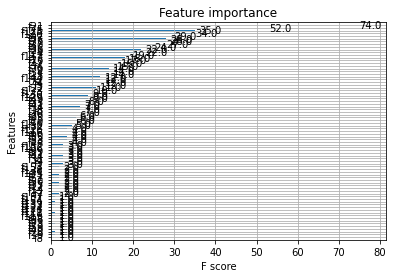

In [9]:
model = XGBClassifier()
model.fit(x, y)

plot_importance(model)
pyplot.show()

Features sorted from highest to lowest (top 10)

In [10]:
nf =  len(model.feature_importances_)
f_list = model.feature_importances_
f_sort = [] 
for i in range(nf):
    f_sort.append(i)


for i in range(nf):
    for j in range(nf-1):
        if f_list[j] < f_list[j+1]:
            js = f_list[j]
            f_list[j] = f_list[j+1]
            f_list[j+1] = js
            js = f_sort[j]
            f_sort[j] = f_sort[j+1]
            f_sort[j+1] = js
            
for i in f_sort[:10]:
    print(feature[i])

av_lum_median
dgi_mode
av_lum_.75
med_lum_fnl
log_gc_fnl
ev_.75
ls_median
log_gc_.75
omega_std
ugr_exp_std


In [11]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pred = [round(value) for value in y_pred]
test = [round(value) for value in y_test]
accuracy = accuracy_score(test,pred)
print('accuracy: ',accuracy*100.0)

[18:15:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  55.26315789473685


Update data

In [19]:
y_labels = ['Noticeable','Imperceptible','Disturbing','Intolerable']
co_label = [[1,0,0,0],
            [0,1,0,0],
            [0,0,1,0],
            [0,0,0,1]]

data = pd.read_csv("./data/data2.csv")
data.dropna(axis = 1, how = 'all')
data.dropna(axis = 0, how = 'any')

feature = data.columns.values 
feature = np.delete(feature,1)

y = data.iloc[:,1].values
x = data.drop(columns = ['describe']).values
for i in range(len(y)):
    for j in range(4):
        if y[i] == y_labels[j]:
            y[i] = j
            


for i in range(len(x)):
    if x[i][1] == '2A':
        x[i][1] = 2
    elif x[i][1] == '2B':
        x[i][1] = 3

print(x.shape)

(428, 17)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


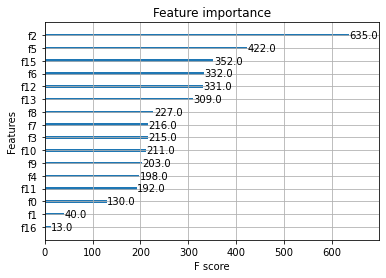

In [20]:
model = XGBClassifier()
model.fit(x, y)

plot_importance(model)
pyplot.show()

In [21]:
nf =  len(model.feature_importances_)
f_list = model.feature_importances_
f_sort = [] 
for i in range(nf):
    f_sort.append(i)


for i in range(nf):
    for j in range(nf-1):
        if f_list[j] < f_list[j+1]:
            js = f_list[j]
            f_list[j] = f_list[j+1]
            f_list[j+1] = js
            js = f_sort[j]
            f_sort[j] = f_sort[j+1]
            f_sort[j+1] = js
            
for i in f_sort:
    print(feature[i])

Glare_diagram
ugr
dgi
log_gc
ugr_exp
cgi
participant
edir
ev
eindir
av_lum
med_lum
dgp
av_lum_cie
dgi_mod
Experiment
ugp
